#### Assignment 2
#### Yiying Peng

In [1]:
install.packages("MASS")
install.packages("VIF")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(MASS)
library(caret)
library(corrplot)
library(tidyverse)
library(VIF)

#### Take the Boston Housing Data which is available in MASS package

In [4]:
data(Boston)
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

#### We want to predict median house price. Select the features from the given.
#### Arrange the features in the order of their importance.

In [5]:
# train the model
model <- glm(medv~.,data=Boston,family=gaussian())
summary(model)
# estimate variable importance
importance <- varImp(model, scale = FALSE)
# summarize importance
print(importance)
importance$rowname <- rownames(importance)
print(importance)
# arrange the features in the order of their importance
importance[order(importance$Overall, decreasing = TRUE),]


Call:
glm(formula = medv ~ ., family = gaussian(), data = Boston)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-15.595   -2.730   -0.518    1.777   26.199  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 

            Overall
crim     3.28651687
zn       3.38157628
indus    0.33431004
chas     3.11838086
nox      4.65125741
rm       9.11614020
age      0.05240243
dis      7.39800360
rad      4.61289977
tax      3.28000914
ptratio  7.28251056
black    3.46679256
lstat   10.34714580
            Overall rowname
crim     3.28651687    crim
zn       3.38157628      zn
indus    0.33431004   indus
chas     3.11838086    chas
nox      4.65125741     nox
rm       9.11614020      rm
age      0.05240243     age
dis      7.39800360     dis
rad      4.61289977     rad
tax      3.28000914     tax
ptratio  7.28251056 ptratio
black    3.46679256   black
lstat   10.34714580   lstat


,Overall,rowname
lstat,10.34714580,lstat
rm,9.11614020,rm
dis,7.39800360,dis
ptratio,7.28251056,ptratio
nox,4.65125741,nox
rad,4.61289977,rad
black,3.46679256,black
zn,3.38157628,zn
crim,3.28651687,crim
tax,3.28000914,tax


#### Divide the data into training and testing. Fit a linear model.

In [6]:
# 75% of the sample size
smp_size <- floor(0.75 * nrow(Boston))

# set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(Boston)), size = smp_size)

train <- Boston[train_ind, ]
test <- Boston[-train_ind, ]

#### Which variable have a strong relation to median price.

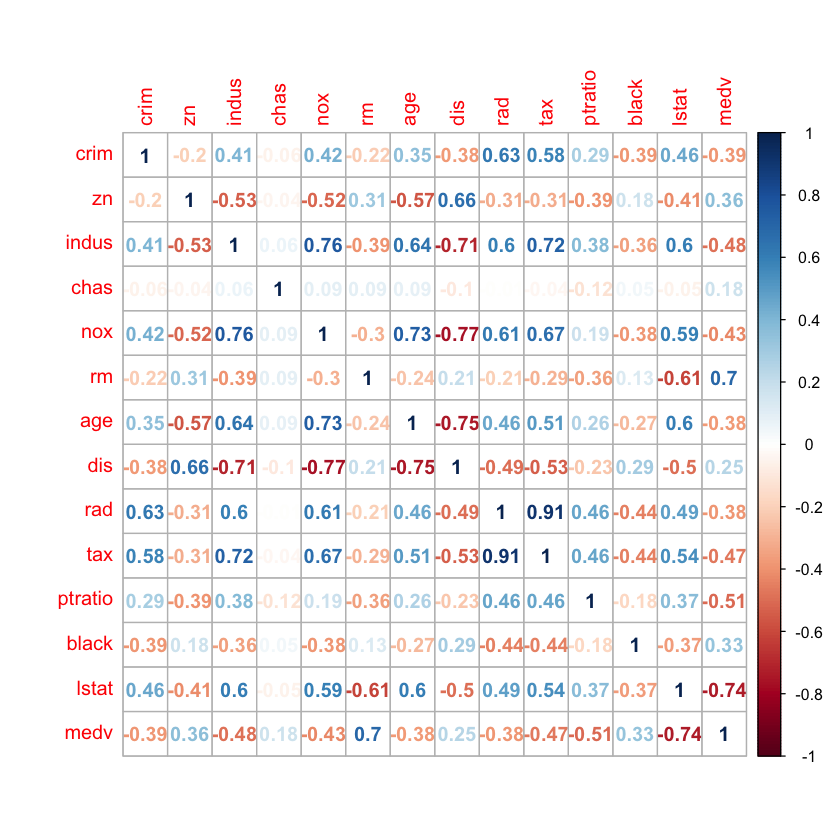

In [7]:
# 4correlation coefficient
M <- cor(Boston)
corrplot(M, method = "number") 

#### Are there any multicollinear features?

In [8]:
# Build the model
model1 <- lm(medv ~., data = train)
model1
# Make predictions
predictions <- model1 %>% predict(test)
# Model performance
data.frame(
  RMSE = RMSE(predictions, test$medv),
  R2 = R2(predictions, test$medv)
)


Call:
lm(formula = medv ~ ., data = train)

Coefficients:
(Intercept)         crim           zn        indus         chas          nox  
  40.074639    -0.088151     0.046131     0.056639     3.360837   -19.274100  
         rm          age          dis          rad          tax      ptratio  
   3.454551     0.004943    -1.577366     0.332795    -0.013145    -0.967219  
      black        lstat  
   0.009372    -0.570498  


RMSE,R2
4.439064,0.7844692


In [9]:
# Detecting multicollinearity
vif(lm(medv ~., data = train, na.action = na.exclude))

Warning message in mean.default(y):
“argument is not numeric or logical: returning NA”

ERROR: Error in as.vector(y) - mean(y): non-numeric argument to binary operator


In [10]:
# the VIF score for the predictor variable tax is very high (VIF = 9.16). 
# This might be problematic.

# Dealing with multicollinearity
# Build a model excluding the tax variable
model2 <- lm(medv ~. -tax, data = train)
model2

# Make predictions
predictions <- model2 %>% predict(test)

# Model performance
data.frame(
  RMSE = RMSE(predictions, test$medv),
  R2 = R2(predictions, test$medv)
)


Call:
lm(formula = medv ~ . - tax, data = train)

Coefficients:
(Intercept)         crim           zn        indus         chas          nox  
  37.888840    -0.087940     0.035548    -0.041813     3.666150   -20.253762  
         rm          age          dis          rad      ptratio        black  
   3.572296     0.003349    -1.607515     0.148683    -0.989691     0.009666  
      lstat  
  -0.562381  


RMSE,R2
4.459116,0.7837178


In [11]:
# It can be seen that removing the tax variable does not affect very much of 
# the model performance metrics.

#### Plot the predicted values of the test data.

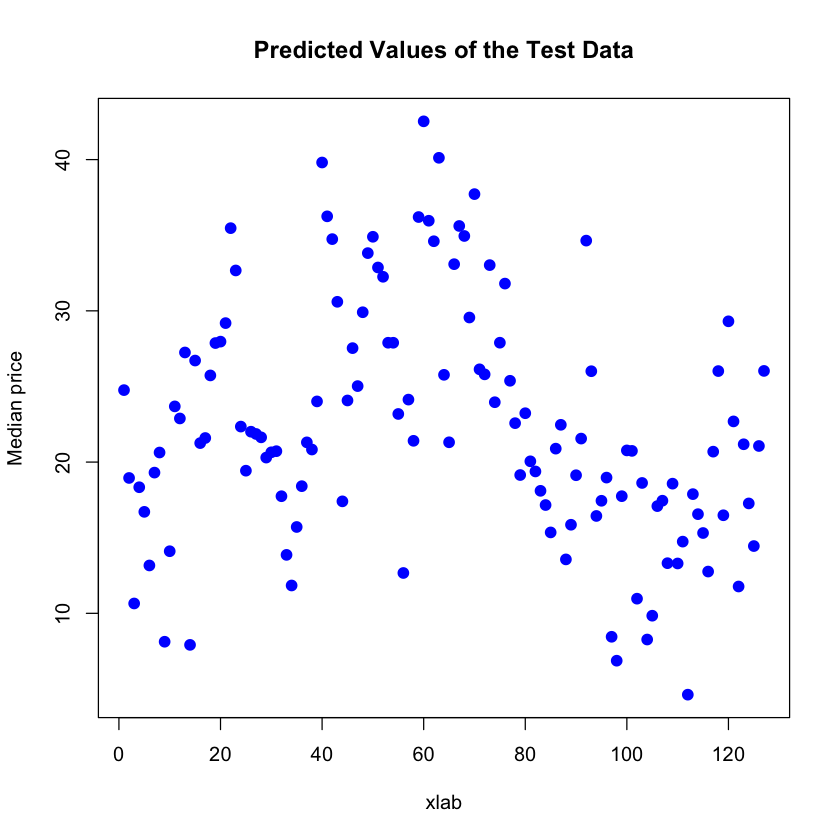

In [12]:
plot(predictions, pch = 16, cex = 1.3, col = "blue", main = "Predicted Values of the Test Data", xlab = "xlab", ylab = "Median price")